In [1]:
import numpy as np
import pandas as pd
#pandas: data analysis 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from scipy.stats import kurtosis,skew
import seaborn as sns
#seaborn: statistical graphing 
from ydata_profiling import ProfileReport
%matplotlib inline

In [33]:
###Data Generation

#Since we do not have access to the data currently, I will be putting in random 
# data. 
parameters = ["Energy Converter", "Array?", "Number Of Devices", 
              "Square Footage", "Salinity", "Temperature", 
              "Oxygen Concentration" ]
#I will only be defining a limited number of parameters based on what was listed
# in the paper. However, the paper says it consideres 21 parameters, so ideally
# we will get up to that. 

#Since we do not have data, we will use a random number generator for the data.

rng = np.random.default_rng(12345)

#For energy converters, we will generate random data from 1 to 149 (there were 
# 149 energy converters assessed, so we are randomly assigning data to one of 
# these converters)
EnergyConverter = rng.integers(low = 1, high = 150, size = 500)

#For Array? we will generate 500 points of data from 0 to 1, where 1 is true 
#and 0 is false. In our data, we might have to convert the data from strings to 
# 0s and 1s. 

Array = rng.integers(low = 0, high = 2, size = 500)

#For number of devices, we will generate a number between 1 and 10 (since I am 
# not sure what kind of arrays we are looking at, I'm just setting the max to 
# 10. 

Devices = rng.integers(low = 1, high = 11, size = 500)

#Square footage will be from 10 to 500.

SqFt = rng.integers(low = 10, high = 500, size = 500)

#Average Salinity of the ocean is 34.7 psu with a variation from 30 to 38

Salinity = rng.normal(34.7, 4.7, 500)

#Ocean surface temperature can go from 2C to 30C with an average of 17C. 

Temperature = rng.normal(17,15,500)

#Oxygen Concentration is between 7 and 8 milligrams per liter

Oxygen = rng.random(500)
for i in range(len(Oxygen)):
    Oxygen[i] = Oxygen[i]+7

append = np.stack((EnergyConverter, Array, Devices, SqFt, Salinity, Temperature, Oxygen))

appenddf = append.T
Data = pd.DataFrame(data = appenddf, columns = parameters)

,Energy Converter,Array?,Number Of Devices,Square Footage,Salinity,Temperature,Oxygen Concentration
0,105.0,1.0,6.0,371.0,37.512993,36.368871,7.930154
1,34.0,0.0,8.0,90.0,22.888472,28.035215,7.500509
2,118.0,0.0,10.0,311.0,35.525308,-18.636862,7.390599
3,48.0,0.0,10.0,105.0,30.573924,36.854218,7.324769
4,31.0,0.0,6.0,348.0,32.128769,22.923172,7.518916
...,...,...,...,...,...,...,...
495,129.0,0.0,6.0,190.0,31.962374,35.461311,7.833992
496,57.0,1.0,6.0,53.0,32.514043,3.858447,7.723481
497,50.0,0.0,2.0,251.0,34.025244,-0.073028,7.572304
498,113.0,1.0,10.0,439.0,28.234986,11.592475,7.427193


In [34]:
Data
#here we see the dataframe of the sample data

,Energy Converter,Array?,Number Of Devices,Square Footage,Salinity,Temperature,Oxygen Concentration
0,105.0,1.0,6.0,371.0,37.512993,36.368871,7.930154
1,34.0,0.0,8.0,90.0,22.888472,28.035215,7.500509
2,118.0,0.0,10.0,311.0,35.525308,-18.636862,7.390599
3,48.0,0.0,10.0,105.0,30.573924,36.854218,7.324769
4,31.0,0.0,6.0,348.0,32.128769,22.923172,7.518916
...,...,...,...,...,...,...,...
495,129.0,0.0,6.0,190.0,31.962374,35.461311,7.833992
496,57.0,1.0,6.0,53.0,32.514043,3.858447,7.723481
497,50.0,0.0,2.0,251.0,34.025244,-0.073028,7.572304
498,113.0,1.0,10.0,439.0,28.234986,11.592475,7.427193


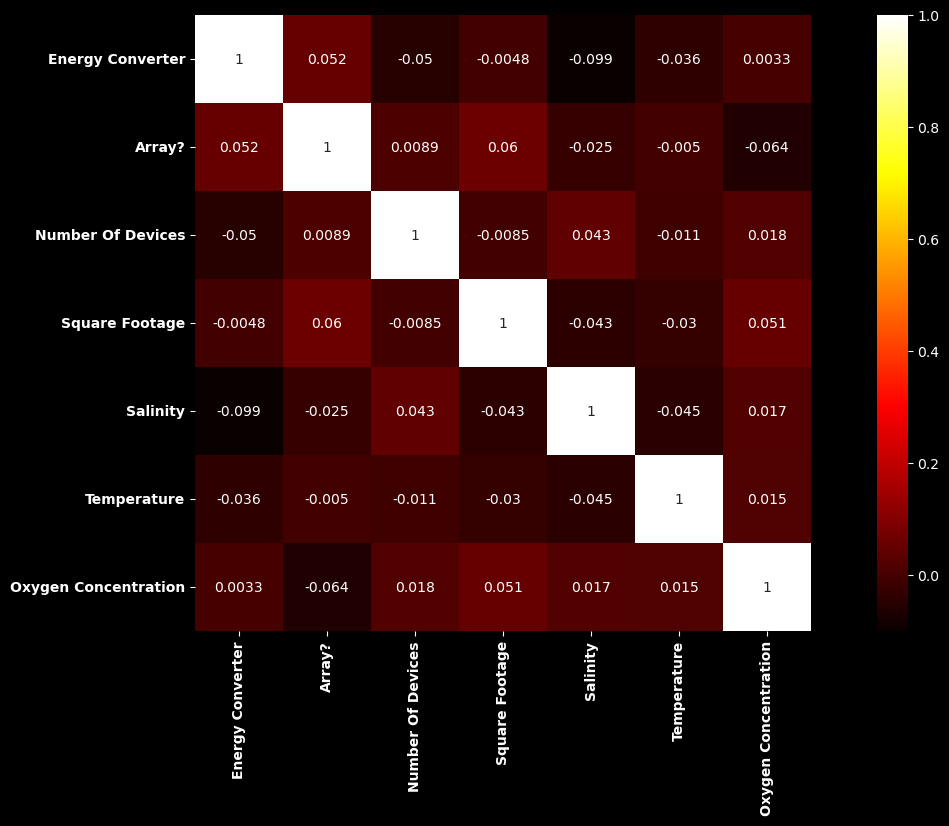

In [41]:
#Here we will see any linear correlation between the data. 
plt.style.use('dark_background')
plt.figure(figsize=(17,8))
sns.heatmap(Data.corr(numeric_only = True),annot=True,square=True,cmap='hot')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

<Figure size 1500x1000 with 0 Axes>

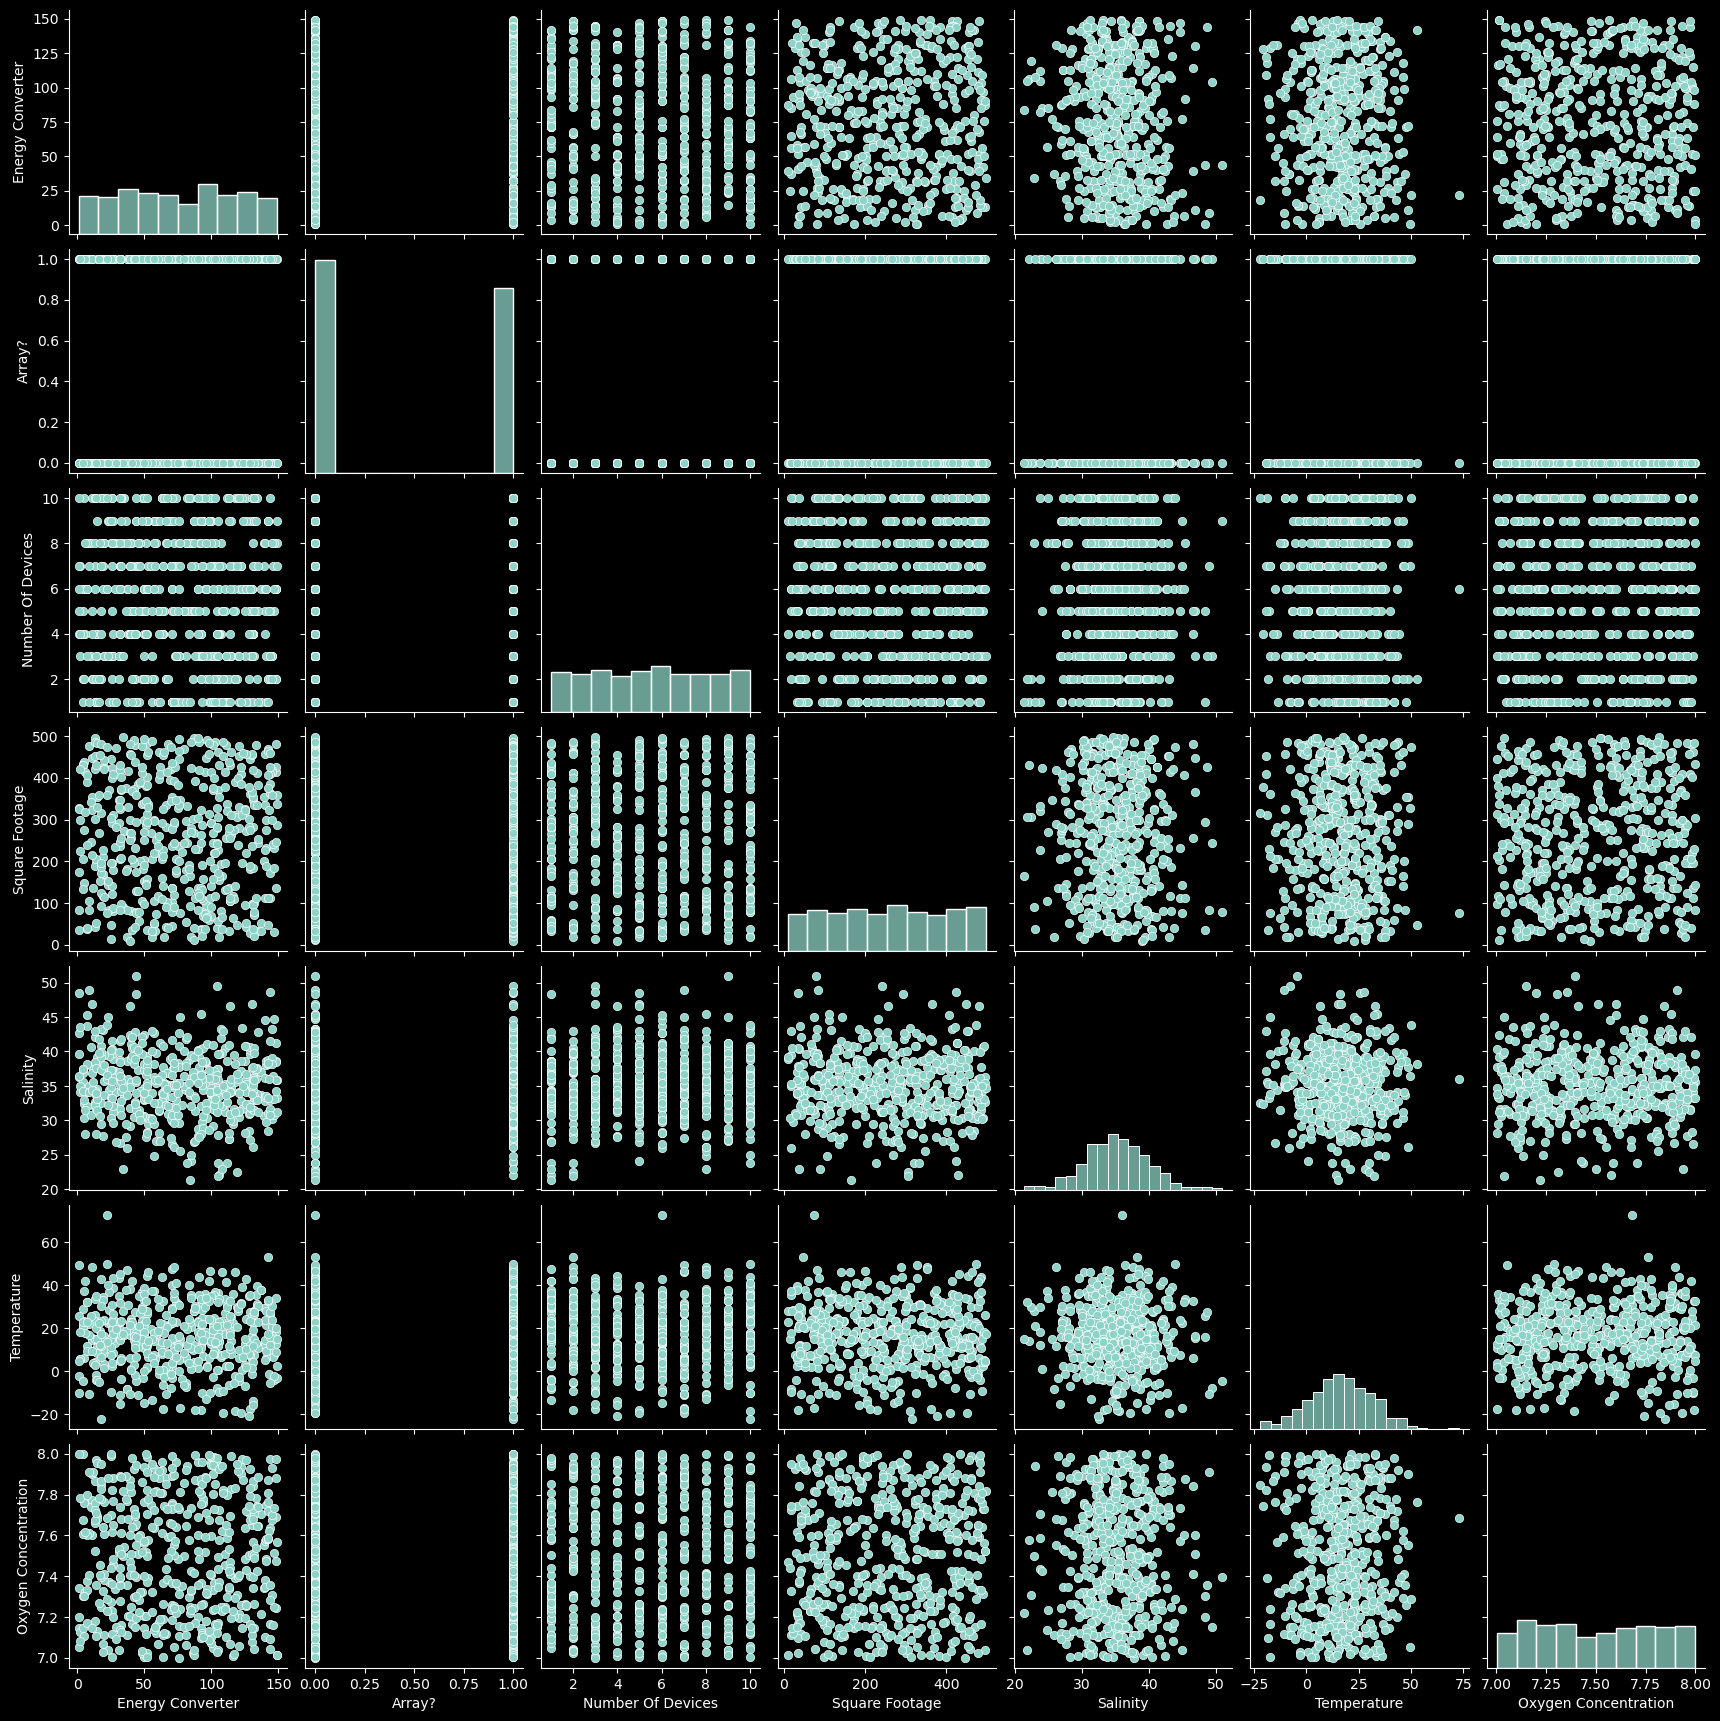

In [44]:
#Here we look at the pairplotdata. Some of it looks weird b/c it's an integer
# value. However, we can see the data distribution (uniform vs gaussian) for 
# whichever ones we chose. Also we can see any correlation here. 
#In the future, this style of plot is perhaps too big. Will have to look into
# other styles to use. 
plt.style.use('dark_background')
plt.figure(figsize=(15,10))
sns.pairplot(Data)


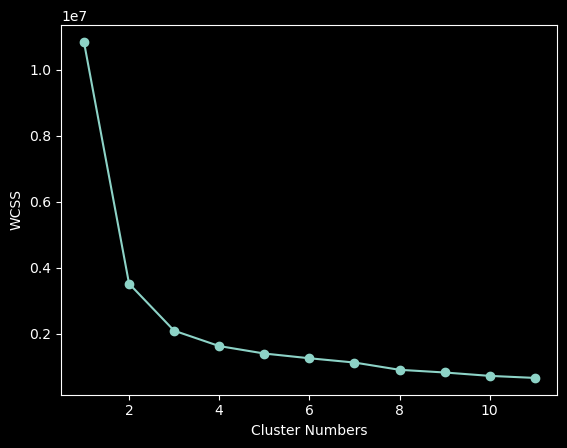

In [45]:
cluster_no=[i for i in range(1,12)]
#Makes an array of integers from 1 to 12
#print(cluster_no)
WCSS=[]
for i in cluster_no:
    cluster=KMeans(init='k-means++',n_clusters=i,random_state=42)
    cluster.fit(Data)
    WCSS.append(cluster.inertia_)

plt.plot(cluster_no,WCSS,marker='o')
plt.xlabel('Cluster Numbers')
plt.ylabel('WCSS')
plt.savefig('Inertia vs # of clusters')

In [ ]:
#We can see that 4 clusters is a pretty good number of clusters

cluster=KMeans(init='k-means++',n_clusters=4,random_state=42)
Data['Cluster_No']=cluster.fit_predict(Data)